In [24]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
import seaborn as sns
import common.common_pandas_lib as common

## Configuraciones

In [25]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
#pd.options.display.float_format = '{:20,.8f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [26]:
TAM_TITULO = 35
TAM_ETIQUETA = 30

### Configuraciones de librerias

In [27]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
#pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Carga optimizada del set de datos

In [28]:
df = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \
                
                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \

                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

### Funciones auxiliares

In [29]:
def crear_porcentaje_superficie_mexico_df(df_mexico):
    provincia = []
    porcentaje = []
    area_total = df_mexico["Shape_Area"].sum()
    for index, row in df_mexico.iterrows():
        provincia.append(row["ADMIN_NAME"])
        porcentaje.append((row["Shape_Area"] * 100) / area_total)
    dic = {"provincia": provincia, "porcentaje de area": porcentaje}
    return pd.DataFrame(dic)

### Datos

In [30]:
METROS_CUADRADOS_MEXICO = 1.97255*10**12

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en provincia:

In [31]:
n_provincia_nan = df["provincia"].isnull().sum()
n_provincia_nan

155

### Cantidad de NAN en escuelascercanas:

In [32]:
n_metrostotales_nan = df["metrostotales"].isnull().sum()
n_metrostotales_nan

51467

In [33]:
df = df.dropna(subset=["provincia"])
df = df.dropna(subset=["metrostotales"])

### ¿Cuál es el promedio de metros totales por provincia?

In [34]:
provincia_promedio_metrostotales = df.groupby("provincia")["metrostotales"].mean()

(<Figure size 1000x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f69b1b6208>)

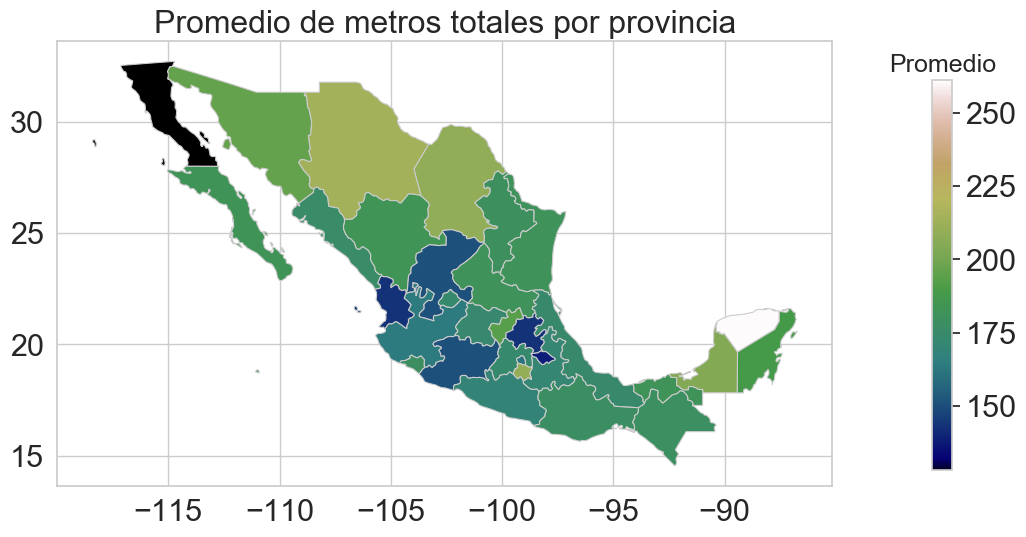

<Figure size 1250x1250 with 0 Axes>

In [35]:
common.crear_mapa(provincia_promedio_metrostotales, "metrostotales", provincia_promedio_metrostotales.min(), 
           provincia_promedio_metrostotales.max(), "Promedio de metros totales por provincia", "Promedio", "gist_earth")

#### Top 5 provincias con mayor promedio de metros totales

In [36]:
provincias_mayores_metrostotales_df = provincia_promedio_metrostotales.nlargest(5).to_frame()
provincias_mayores_metrostotales_df.rename(columns = {'metrostotales': 'Mayores promedios en metros totales'}, inplace=True)
provincias_mayores_metrostotales_df

,Mayores promedios en metros totales
provincia,
Yucatán,261.063641
Chihuahua,213.807702
Morelos,209.622986
Coahuila,208.891884
Campeche,204.650655


#### Top 5 provincias con menores promedio de metros totales

In [37]:
provincias_menores_metrostotales_df = provincia_promedio_metrostotales.nsmallest(5).to_frame()
provincias_menores_metrostotales_df.rename(columns = {'metrostotales': 'Menores promedios en metros totales'}, inplace=True)
provincias_menores_metrostotales_df

,Menores promedios en metros totales
provincia,
Baja California Norte,128.017080
Tlaxcala,138.093878
Hidalgo,143.103038
Nayarit,143.555000
Zacatecas,150.939759


### ¿Cómo se distribuyen los metros cubiertos para las provincias con más propiedades?

In [38]:
provincias_cantidad_propiedades = df["provincia"].value_counts()
provincias_mas_propiedades = provincias_cantidad_propiedades.nlargest(6)
provincias_mas_propiedades = list(provincias_mas_propiedades.index)
df_reducido = df[df["provincia"].isin(provincias_mas_propiedades)]
df_reducido = df_reducido.sort_values("provincia")

In [39]:
metrostotales_provincia_estadistica = common.agrupar_calcular_estadisticas_desagrupar(df_reducido, "provincia", "metrostotales")
metrostotales_provincia_estadistica = metrostotales_provincia_estadistica.sort_values("provincia")

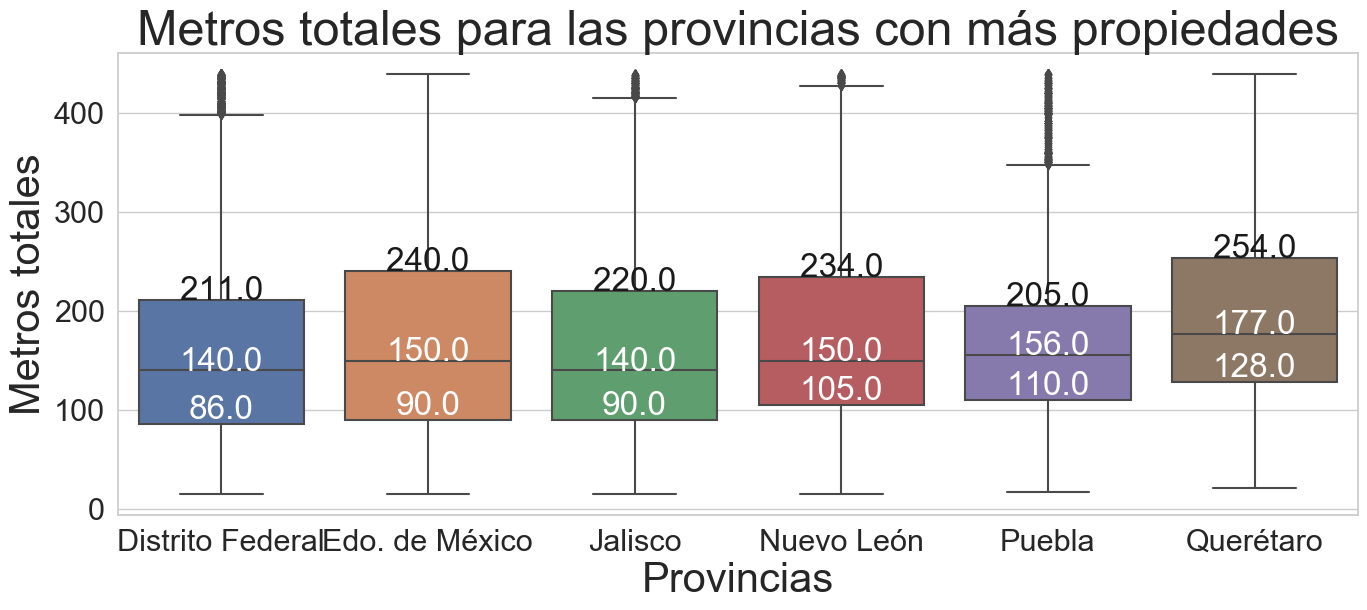

In [40]:
plt.figure(figsize=(16, 6))
plot_box_metrostotales = sns.boxplot(x="provincia", y="metrostotales", data=df_reducido)
common.agregar_serie_plot(plot_box_metrostotales, metrostotales_provincia_estadistica["metrostotales_median"],
                          metrostotales_provincia_estadistica["metrostotales_median"], "w", 0, 0)
common.agregar_serie_plot(plot_box_metrostotales, metrostotales_provincia_estadistica["metrostotales_cuantil_1"],
                          metrostotales_provincia_estadistica["metrostotales_cuantil_1"], "w", 0, 5)
common.agregar_serie_plot(plot_box_metrostotales, metrostotales_provincia_estadistica["metrostotales_cuantil_3"],
                          metrostotales_provincia_estadistica["metrostotales_cuantil_3"], "k", 0, 0)
common.setear_titulos_plot(plot_box_metrostotales, "Metros totales para las provincias con más propiedades",
                          "Provincias", "Metros totales")

### ¿Cuál es el promedio de metros cubiertos por provincia?

In [41]:
provincia_promedio_cubiertos = df.groupby("provincia")["metroscubiertos"].mean()

(<Figure size 1000x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f68c2cdf28>)

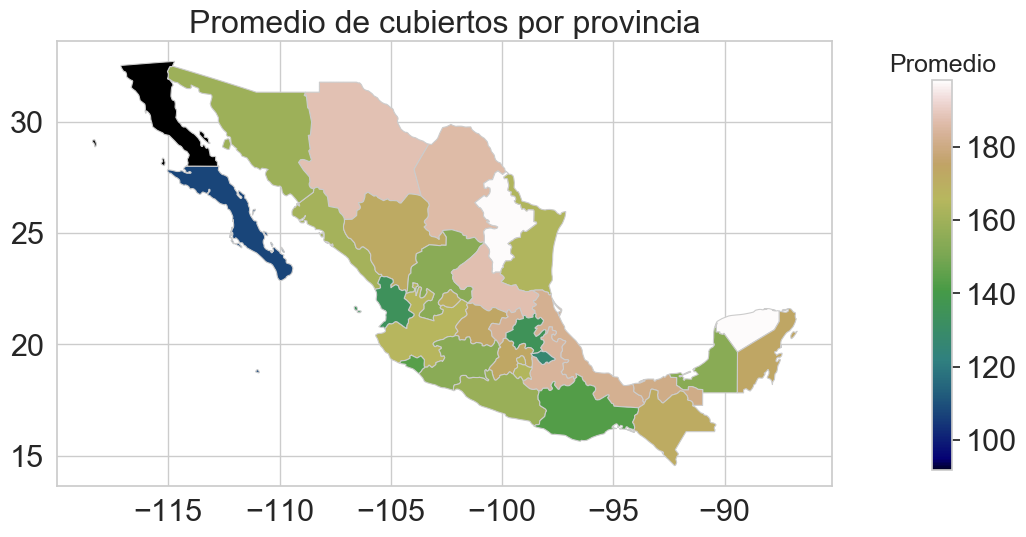

<Figure size 1250x1250 with 0 Axes>

In [42]:
common.crear_mapa(provincia_promedio_cubiertos, "metroscubiertos", provincia_promedio_cubiertos.min(), 
           provincia_promedio_cubiertos.max(), "Promedio de cubiertos por provincia", "Promedio", "gist_earth")

#### Top 5 provincias con mayor promedio de metros cubiertos

In [43]:
provincias_mayores_cubiertos_df = provincia_promedio_cubiertos.nlargest(5).to_frame()
provincias_mayores_cubiertos_df.rename(columns = {'metroscubiertos': 'Mayores promedios en metros cubiertos'}, inplace=True)
provincias_mayores_cubiertos_df

,Mayores promedios en metros cubiertos
provincia,
Yucatán,198.070650
Nuevo León,197.750239
Chihuahua,187.778686
San luis Potosí,187.495231
Coahuila,186.247502


#### Top 5 provincias con menores promedio de metros cubiertos

In [44]:
provincias_menores_cubiertos_df = provincia_promedio_cubiertos.nsmallest(5).to_frame()
provincias_menores_cubiertos_df.rename(columns = {'metroscubiertos': 'Menores promedios en metros cubierots'}, inplace=True)
provincias_menores_cubiertos_df

,Menores promedios en metros cubierots
provincia,
Baja California Norte,91.728365
Baja California Sur,107.727657
Tlaxcala,127.060958
Nayarit,134.291705
Hidalgo,135.336529


### ¿Cómo se distribuyen los metros cubiertos para las provincias con más propiedades?

In [45]:
metroscubiertos_provincia_estadistica = common.agrupar_calcular_estadisticas_desagrupar(df_reducido, "provincia", "metroscubiertos")
metroscubiertos_provincia_estadistica = metroscubiertos_provincia_estadistica.sort_values("provincia")

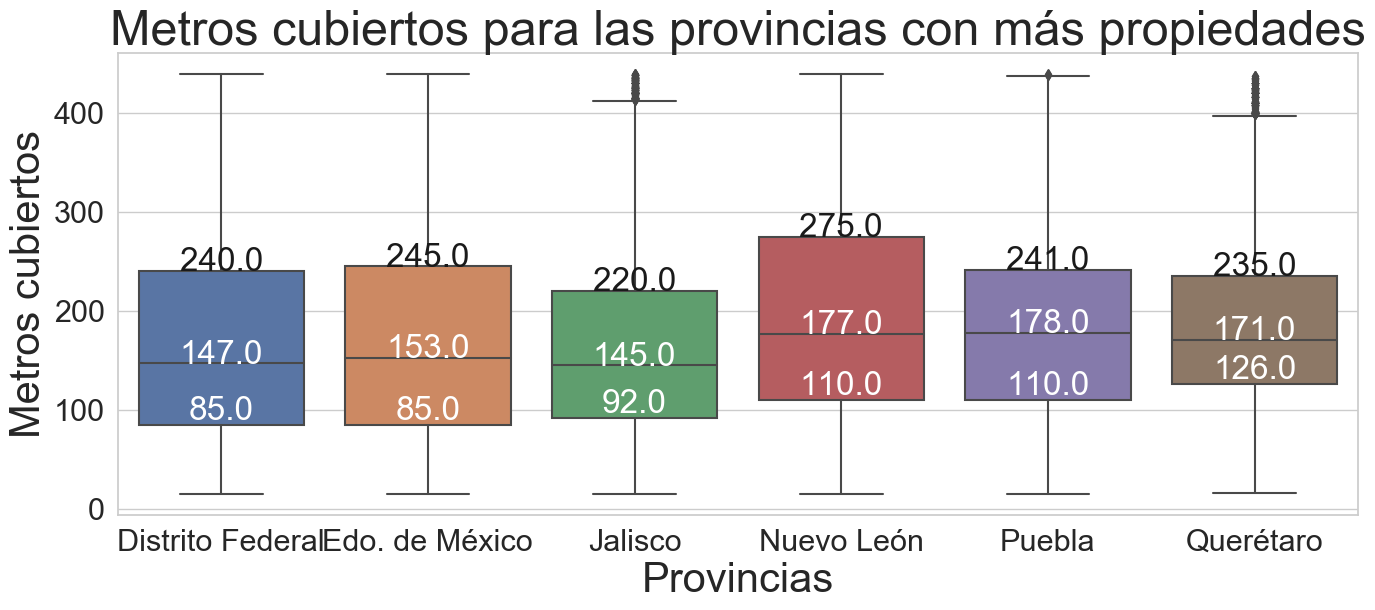

In [46]:
plt.figure(figsize=(16, 6))
plot_box_metroscubiertos = sns.boxplot(x="provincia", y="metroscubiertos", data=df_reducido)
common.agregar_serie_plot(plot_box_metroscubiertos, metroscubiertos_provincia_estadistica["metroscubiertos_median"],
                          metroscubiertos_provincia_estadistica["metroscubiertos_median"], "w", 0, 0)
common.agregar_serie_plot(plot_box_metroscubiertos, metroscubiertos_provincia_estadistica["metroscubiertos_cuantil_1"],
                          metroscubiertos_provincia_estadistica["metroscubiertos_cuantil_1"], "w", 0, 5)
common.agregar_serie_plot(plot_box_metroscubiertos, metroscubiertos_provincia_estadistica["metroscubiertos_cuantil_3"],
                          metroscubiertos_provincia_estadistica["metroscubiertos_cuantil_3"], "k", 0, 0)
common.setear_titulos_plot(plot_box_metroscubiertos, "Metros cubiertos para las provincias con más propiedades",
                          "Provincias", "Metros cubiertos")